
import urllib.request
import ijson
import itertools
import requests
import bs4
import nltk

kjhkhkjhkj

In [2]:
root_url = 'http://data.cstr.ed.ac.uk/globalvox/asr/2017/'
index_url = root_url + '?C=N;O=D'
def getUrls():
    response = requests.get(index_url)
    soup = bs4.BeautifulSoup(response.text, "lxml")
    #return [a.attrs.get('href') for a in soup.select('[href^=201706]')]
    return [a.attrs.get('href') for a in soup.select('[href^=2017]')]

urls = []
for item in getUrls():
    urls.append(root_url + item)
urls

['http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170627_060900_best_of_today.asr.json',
 'http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170626_231400_global_news_podcast.asr.json',
 'http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170626_222100_world_business_report.asr.json',
 'http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170626_210000_newshour.asr.json',
 'http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170626_173000_six_oclock_news.asr.json',
 'http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170626_152800_global_news_podcast.asr.json',
 'http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170626_151000_world_business_report.asr.json',
 'http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170626_140000_newshour.asr.json',
 'http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170626_133100_best_of_today.asr.json',
 'http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170626_124500_world_at_one.asr.json',
 'http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170626_122200_best_of_today.asr.json',
 'http://data

In [3]:
########从上方地址 完整复制需要查询的区间，区间不宜大于80###########

print ("[", urls.index("http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170626_231400_global_news_podcast.asr.json"),":",
       urls.index("http://data.cstr.ed.ac.uk/globalvox/asr/2017/20170626_060900_best_of_today.asr.json") + 1,"]")

[ 1 : 13 ]


In [4]:
#################输入上面找到的数字，即需要整合的下标区间###########

a = []
for item in urls[1:13]:     #这里输入上面找到的数字，即需要整合的下标区间
    f = urllib.request.urlopen(item)
    objects = ijson.items(f, "segments.item")
    segments = list (objects)
    spokenWords = [words["spokenWords"] for words in segments]
    spokenWords = list(itertools.chain.from_iterable(spokenWords))
    a.append(spokenWords)
    
spokenWords = list(itertools.chain.from_iterable(a))

In [5]:
cols = list(spokenWords[0].keys())
rows = []
indices = []
for index, d in enumerate(spokenWords):
    indices.append(index)
    values = []
    for col in cols:
        values.append(d[col])
    rows.append(values)

df = pd.DataFrame(rows, index = indices, columns = cols)
df

,wordEnd,wordId,wordStart,wordConfidence
0,7.8200000000000003,THIS,7.6799999999999997,0.97999999999999998
1,7.9500000000000002,IS,7.8200000000000003,0.97999999999999998
2,8.0399999999999991,THE,7.9500000000000002,1
3,8.5899999999999999,B.B.C.,8.0399999999999991,1
4,9.3200000000000003,FOR,9.2400000000000002,0.87
5,9.8100000000000005,DETAILS,9.3200000000000003,1
6,9.9000000000000004,OF,9.8100000000000005,0.97999999999999998
7,10.01,A,9.9000000000000004,0.88
8,10.51,COMPLETE,10.02,1
9,10.779999999999999,RANGE,10.51,1


In [6]:
#计算重复次数，并得到两个list，分别为wordId和重复次数数据
wordId = list(df.wordId)
myset = set(wordId)
statItem = []
statCount = []
for item in myset:
    statItem.append(item)
    statCount.append(wordId.count(item))   

#两个list先转数组然后整合在一起
a = np.array(statItem)
b = np.array(statCount)
c = np.vstack((a,b))
data = pd.DataFrame(c).T
data.columns=["Words", "Repeat"]

data = data.convert_objects(convert_numeric=True) #数组类型整理
data

/Users/Kunry/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,Words,Repeat
0,PARTIES,14
1,RELEASE,1
2,HANDED,6
3,MANGO,1
4,PERSONALLY,1
5,TWISTERS,1
6,MOTHER,9
7,EXPRESS,1
8,WHEN,103
9,GOLF,1


In [ ]:
data = data.sort_values(by = 'Repeat',ascending = False)    #按重复次数降序排序
data["data"] = 16.5  
data

In [8]:
data350 = data [data["Repeat"] > 350]        #筛选重复300次以上的词汇   

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

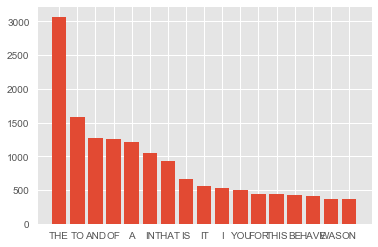

In [10]:
a = np.array(data350.Words)
b = np.array(data350.Repeat)
plt.bar(range(len(a)), b, tick_label=a)
plt.show()

In [11]:
dataSelect =  data [(data["Words"] == "FIRST")|(data["Words"] == "BOOK")|(data["Words"] == "THE")]
dataSelect

,Words,Repeat
3616,THE,3069
3551,FIRST,75
4207,BOOK,20
